# Potential Production

In this example we use PalmSim to explore the **potential production** of differents sites **based on solar radiation** alone.

We will consider sites in **Bangladesh, North Sumatra, South Sumatra and South Kalimantan**.

### What we expect

We expect the yield to go up with the amount of solar radiation.

Thus we expect the site with the highest amount of radiation to have the highest yields.

Furthermore, we expect the strongest variation in yield for the site with the strongest variation in radiation.

## Weather data

Most crop simulations require weather input data. Most commonly:
    - Solar irradiance (MJ/m2/day)
    - Precipation (mm/month)
    
And less important
    - Days with rain (1/month)
    
This demo comes with weather data files which can be found in the inputs folder.
    
**Note, these input files can for instance be opened/altered in Excel.**

In [1]:
# import pandas --- spreadsheet library
import pandas as pd

# import matplotlib --- plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# read-in the csv-files

import os
file_dir = os.path.join('.','input')

weather_data = {}

# load all the files in the input directory
for file in os.listdir(file_dir):
    if file.endswith('.csv'):
        
        filename,ext = file.split('.')
        filepath = os.path.join(file_dir,file)

        df = pd.read_csv(filepath,index_col='Date')
        df.index = pd.to_datetime(df.index)
        
        weather_data[filename] = df

In [2]:
list(weather_data)

['bangladesh', 'North Sumatra', 'South Kalimantan', 'South Sumatra']

#### Note the quite variable solar radiation

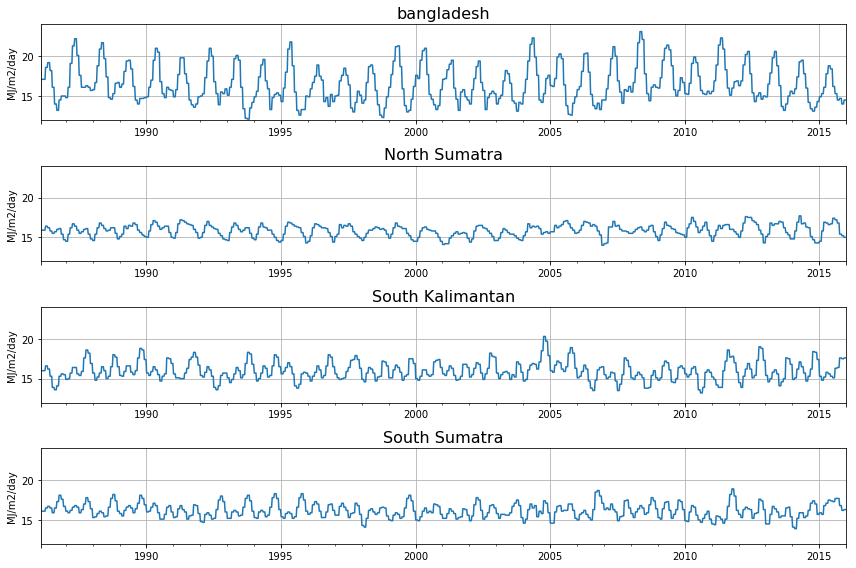

In [3]:
from plotting import tsplot, add_highlight

f,axes = plt.subplots(len(weather_data), figsize=(12,8))

for ax,site in zip(axes,weather_data):

    s = weather_data[site]['solar (MJ/m2/day)']
    s.plot(ax=ax)
    ax.set_ylim(12,24)
    ax.set_xlabel(None)
    ax.set_ylabel('MJ/m2/day')
    ax.grid()
    ax.set_title(site,fontdict={'fontsize':16})
    
plt.tight_layout()

Note the relatively sunny and seasonal weather of Bangladesh compared to the rest.

Unfortunately Bangladesh has strong periodic droughts...

For actual production, probably not ideal (unless you have irrigation):

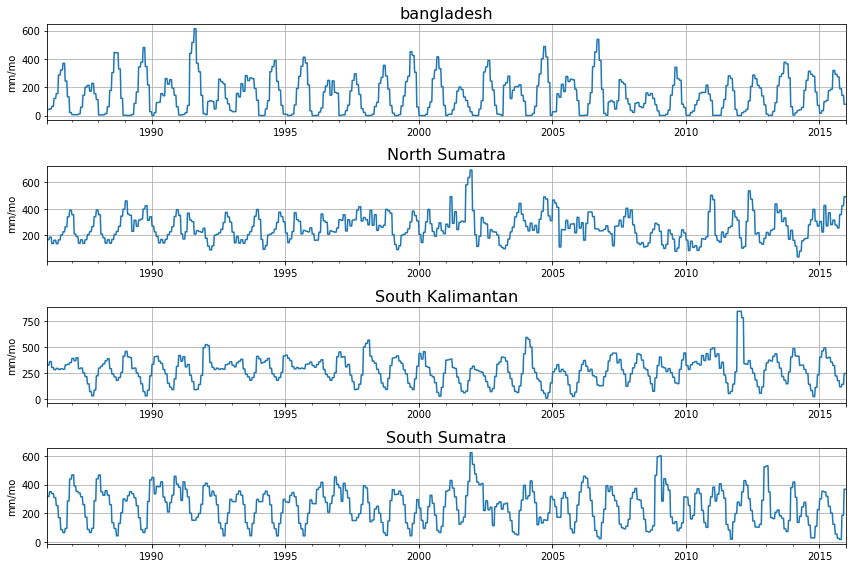

In [4]:
from plotting import tsplot, add_highlight

f,axes = plt.subplots(len(weather_data), figsize=(12,8))

for ax,site in zip(axes,weather_data):

    s = (30*weather_data[site]['precip (mm/day)'])
    s.plot(ax=ax)
    ax.set_ylabel('mm/mo')
    ax.set_xlabel(None)
    ax.grid()
    ax.set_title(site,fontdict={'fontsize':16})
    
plt.tight_layout()

## Potential Yield - mean radiation

All indicates that oil palm productivity is strongly correlated with the available short-wave radiation.

To illustrate this, let us **run PalmSim**, first given the **mean solar radiation data**.

In [5]:
import sys
sys.path.append('../PalmSim')
sys.path.append('..')
from palmsim import PalmField

results = {}
print('Mean radiation:\n')

for site in weather_data:
    
    year_of_planting = weather_data[site].index.year[0]

    # 1. Initialize the model
    p = PalmField(year_of_planting=year_of_planting)

    # 2. Couple the solar radiation data:
    mean_solar_radiation = weather_data[site]['solar (MJ/m2/day)'].mean()
    
    print('{:}: {:>3.2f} MJ/m2/day'.format(site,mean_solar_radiation))
    
    p.weather.radiation = mean_solar_radiation

    # 3. Run the model
    df = p.run(duration=30*365)
    
    results[site] = df

..\palmsim\components\fronds.py:205: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\fronds.py:221: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\fronds.py:263: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\trunk.py:103: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\trunk.py:116: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/lo

Mean radiation:

bangladesh: 16.50 MJ/m2/day
North Sumatra: 15.86 MJ/m2/day
South Kalimantan: 15.98 MJ/m2/day
South Sumatra: 16.19 MJ/m2/day


#### Viewing the results

Running PalmSim returns a spreadsheet (a.k.a. a dataframe) which can be viewed directly here or can be saved as an Excel spreadsheet (.csv or .xlsx) with the command.

```python
df.to_csv('filename.csv')
df.to_excel('filename.xlsx')
```


Let us visualize the results directly.


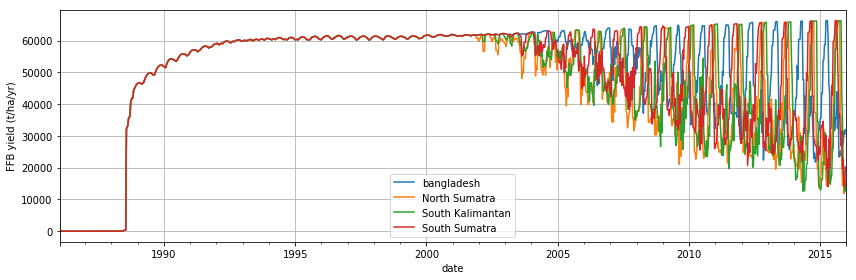

In [6]:
f, ax = plt.subplots(figsize=(12,4))

for site in results:

    s = results[site]['generative_FFB_production (t/ha/yr)']
    s.plot(ax=ax,label=site)
    ax.set_ylabel('FFB yield (t/ha/yr)')
    ax.grid()
    
ax.legend()
plt.tight_layout()

## Potential Yield - radiation-limited

Now let us run PalmSim given the actually **variable solar radiation**.

In [7]:
results = {}
print('Radiation: mean, std\n')

for site in weather_data:
    
    year_of_planting = weather_data[site].index.year[0]

    # 1. Initialize the model
    p = PalmField(year_of_planting=year_of_planting)

    # 2. Couple the solar radiation data:
    mean_solar_radiation = weather_data[site]['solar (MJ/m2/day)'].mean()
    std_solar_radiation = weather_data[site]['solar (MJ/m2/day)'].std()
    
    print('{:<20}: {:<6.3f}, {:<6.3f} MJ/m2/day'.format(site,mean_solar_radiation,std_solar_radiation))
    
    p.weather.radiation_series = weather_data[site]['solar (MJ/m2/day)']

    # 3. Run the model
    df = p.run(duration=30*365)
    
    results[site] = df

Radiation: mean, std

bangladesh          : 16.504, 2.312  MJ/m2/day
North Sumatra       : 15.856, 0.745  MJ/m2/day
South Kalimantan    : 15.983, 1.155  MJ/m2/day
South Sumatra       : 16.188, 0.881  MJ/m2/day


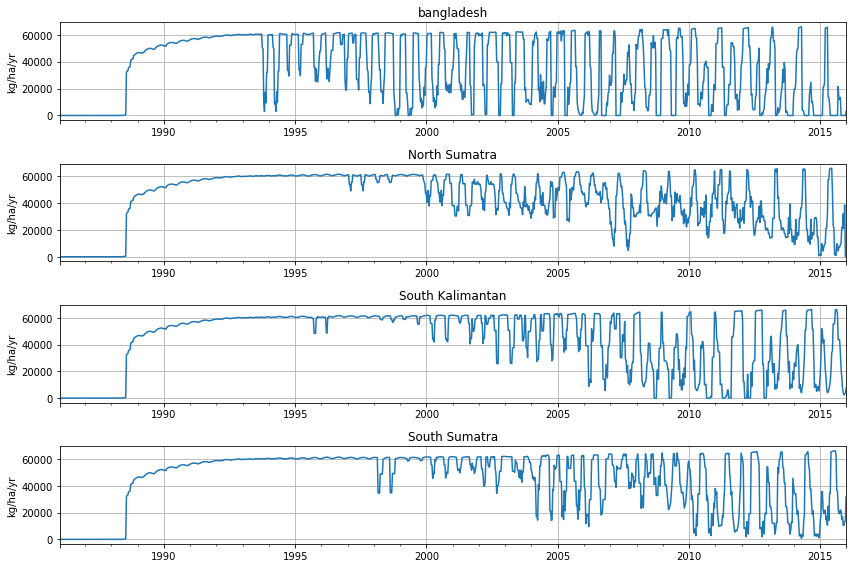

In [12]:
f, axes = plt.subplots(4,1,figsize=(12,8))

for ax, site in zip(axes, results):

    s = results[site]['generative_FFB_production (t/ha/yr)']
    s.plot(ax=ax,label=site)    
    ax.set_ylabel('kg/ha/yr')
    ax.set_xlabel(None)
    ax.set_title(site)
    ax.grid()
    
plt.tight_layout()

## Potential Yield - water-limited potential

Now let us estimate the potential yield as is limited by the **solar radiation** and water-availability - **rainfall**.

In [9]:
results_yw = {}

for site in weather_data:
    
    print(site)
    
    year_of_planting = weather_data[site].index.year[0]

    # 1. Initialize the model
    p = PalmField(year_of_planting=year_of_planting)

    # 2. Couple the solar radiation data:
    p.weather.radiation_series = weather_data[site]['solar (MJ/m2/day)']
    p.weather.rainfall_series = weather_data[site]['precip (mm/day)']
    
    # 3. Run the model
    df = p.run(duration=30*365)
    
    results_yw[site] = df

bangladesh
North Sumatra
South Kalimantan
South Sumatra


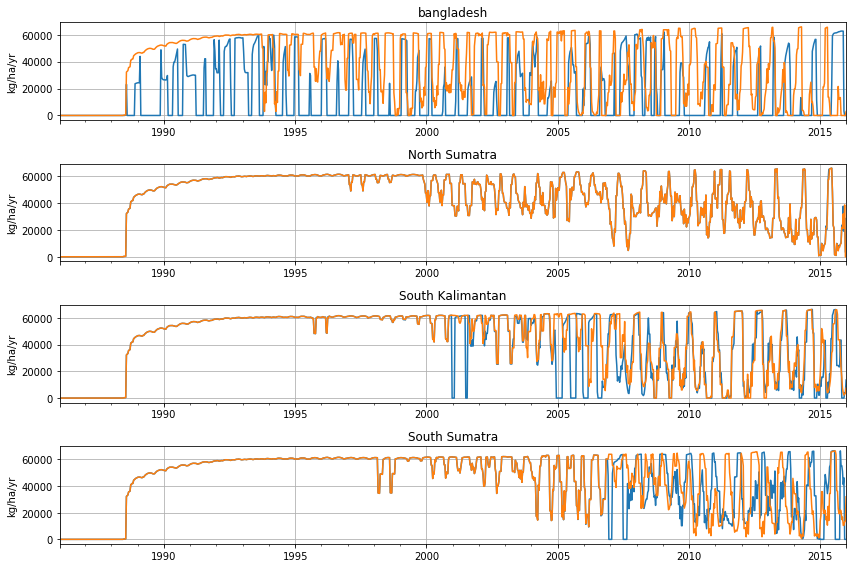

In [11]:
f, axes = plt.subplots(4,1,figsize=(12,8))

for ax, site in zip(axes, results_yw):

    s = results_yw[site]['generative_FFB_production (t/ha/yr)']
    s.plot(ax=ax,label='Yw')

    s = results[site]['generative_FFB_production (t/ha/yr)']
    s.plot(ax=ax,label='Yp')    
    ax.set_ylabel('kg/ha/yr')
    ax.set_xlabel(None)
    ax.set_title(site)
    ax.grid()
    
plt.tight_layout()

Given the available information, we estimate that for the sites in Sumatra and Kalimantan the water-limited production was approx. equal to the potential production, whereas for Bangladesh the water-limited production was significantly lower than the potential production.

### Conclusion

This concludes this example.